## Questions

If someone is stopped, can we predict the probability that they will be frisked?

Is someone is stopped, can we predict the probability that they will be arrested?

If someone is stopped and frisked, can we predict the probability that they will be arrested?

How can we minimize the damage that this unconstitional law inflicts on its citizens?

What observed characteristics lead to arrests?

We chose to look at features that were only available to the officer before the stop was initiated.

Our objective is to maximize the precision of stop and frisks procduces.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import data_cleaner as dc
import importlib

importlib.reload(dc)
df = dc.load_full_sqf()
np.random.seed(5)

In [28]:
#df.info()
filespecs = dc.load_filespecs()
pd.options.display.max_rows=112
pd.options.display.max_colwidth=100
pd.options.display.max_columns=113
filespecs[2016][['Variable', 'Label']]

,Variable,Label
0,year,YEAR OF STOP (CCYY)
1,pct,PRECINCT OF STOP (FROM 1 TO 123)
2,ser_num,UF250 SERIAL NUMBER
3,datestop,DATE OF STOP (MM-DD-YYYY)
4,timestop,TIME OF STOP (HH:MM)
5,recstat,RECORD STATUS
6,inout,WAS STOP INSIDE OR OUTSIDE ?
7,trhsloc,WAS LOCATION HOUSING OR TRANSIT AUTHORITY ?
8,perobs,PERIOD OF OBSERVATION (MMM)
9,crimsusp,CRIME SUSPECTED


## Data Cleaning

No duplicates in the data

zeros were used to fill in missing data.

The data was separated into pre-stop features and during-stop features

In [10]:
df_sample = df.sample(frac=.001)
df_sample.columns

Index(['year', 'pct', 'ser_num', 'recstat', 'inout', 'trhsloc', 'perobs',
       'crimsusp', 'perstop', 'typeofid',
       ...
       'ycoord', 'dettypcm', 'linecm', 'detailcm', 'datetimestop', 'wepfound',
       'forceuse', 'month', 'day', 'detail1_'],
      dtype='object', length=115)

In [11]:
# Feature Engineering
df_sample['height'] = 12*df_sample['ht_feet'] + df_sample['ht_inch']
df_sample = df_sample.drop(columns=['ht_feet', 'ht_inch'])
df_sample.columns

Index(['year', 'pct', 'ser_num', 'recstat', 'inout', 'trhsloc', 'perobs',
       'crimsusp', 'perstop', 'typeofid',
       ...
       'dettypcm', 'linecm', 'detailcm', 'datetimestop', 'wepfound',
       'forceuse', 'month', 'day', 'detail1_', 'height'],
      dtype='object', length=114)

In [12]:
# Feature Engineering
df_sample['height'] = 12*df_sample['ht_feet'] + df_sample['ht_inch']
df_sample = df_sample.drop(columns=['ht_feet', 'ht_inch'])
df_sample.columns

# Splitting observables types
pre_stop_observables = ['year', 'pct', 'ser_num', 'datestop', 'timestop', 'inout',
                        'trhsloc', 'perobs', 'crimsusp', 'offunif', 'cs_objcs', 
                        'cs_descr', 'cs_casng', 'cs_lkout', 'cs_cloth', 'cs_drgtr',
                        'cs_furtv', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid',
                        'ac_time', 'ac_stsnd', 'ac_other', 'repcmd', 'revcmd',
                        'sex', 'race', 'height', 'weight', 'haircolr', 'eyecolor', 
                        'build', 'othfeatr', 'addrtyp', 'rescode', 'premtype',
                        'premname', 'addrnum', 'sector', 'beat', 'post', 'xcoord', 
                        'ycoord', ]



during_stop_observables = ['recstat', 'perstop', 'typeofid', 'explnstp', 'othpers',
                         'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept',
                         'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun',
                         'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep',
                         'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other',
                         'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw',
                         'ac_proxm', 'rf_attir', 'rf_vcact', 'ac_evasv', 'ac_assoc',
                         'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'rf_knowl', 'sb_hdobj',
                         'sb_outln', 'sb_admis', 'rf_furt', 'rf_bulg', 'offverb', 
                         'offshld', 'forceuse', 'dob', 'age', 'dettypCM', 'lineCM', 
                         'detailCM']

targets = ['arstmade', 'arstoffn', 'sumissue', 'sumoffen', 'compyear', 'comppct']

In [13]:
# Drop columns that are missing a lot of data
dropped_columns = ['month', 'day', 'forceuse', 'detail1_', 'arstoffn', 'officrid',
                  'offverb', 'offshld', 'rescode', 'premtype', 'aptnum', 'state',
                  'zip', 'beat', 'post', 'crimsusp', 'stinter', 'stname', 'crossst',
                  'premname', 'sumoffen', 'othfeatr', 'addrnum', 'repcmd','dob',
                  'revcmd', 'datetimestop']
df_sample = df.sample(frac=.001)
df_sample = df_sample.drop(columns=dropped_columns)
y = df_sample.arstmade
X = df_sample.drop(columns='arstmade')
X_category = X.select_dtypes(include ='category')
categories = X_category.columns.to_list()
X_non_category = X.drop(columns=categories)

In [14]:
print(f'Total null values: {X.isna().sum().max()}')
print(y.value_counts())

Total null values: 1850
0    4756
1     330
Name: arstmade, dtype: int64


In [15]:
X_category.info()
#pd.plotting.scatter_matrix(X_category)
#plt.show();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 4870252 to 2844916
Data columns (total 13 columns):
recstat     4937 non-null category
inout       5048 non-null category
trhsloc     3236 non-null category
typeofid    5049 non-null category
sex         5086 non-null category
race        5086 non-null category
haircolr    5086 non-null category
eyecolor    5086 non-null category
build       5086 non-null category
addrtyp     5052 non-null category
city        4332 non-null category
sector      4201 non-null category
dettypcm    4332 non-null category
dtypes: category(13)
memory usage: 108.8 KB


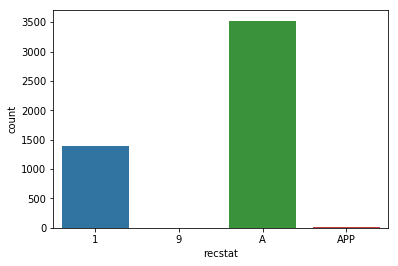

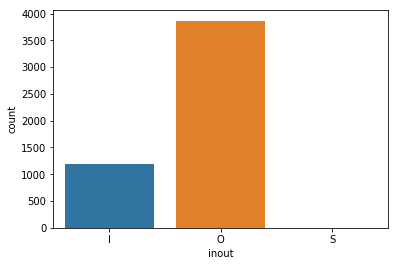

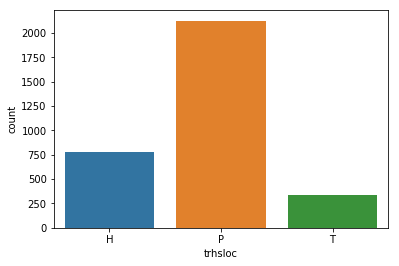

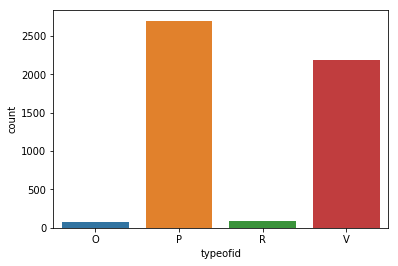

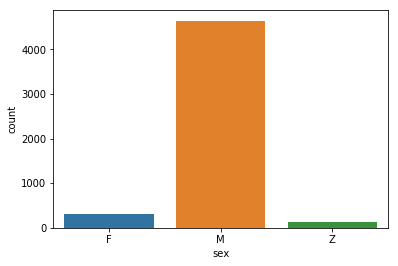

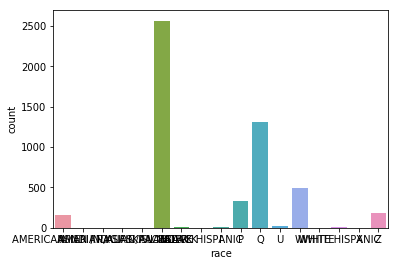

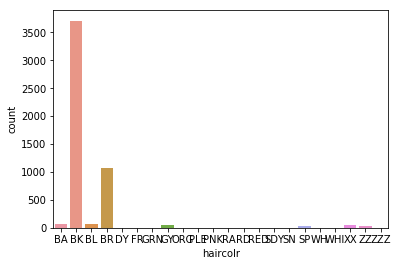

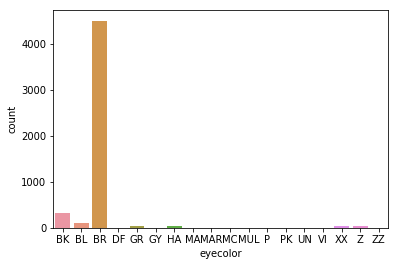

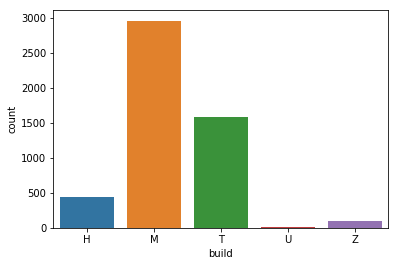

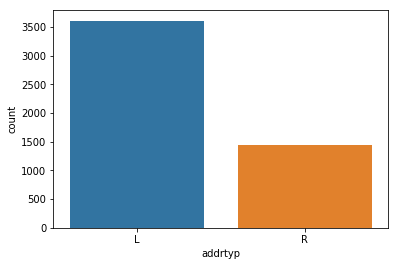

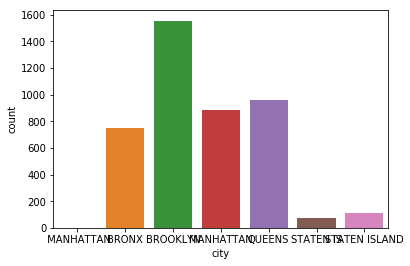

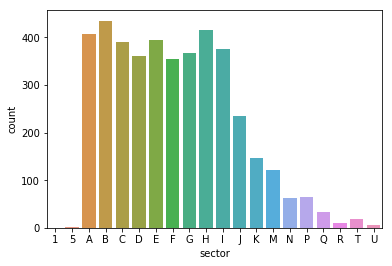

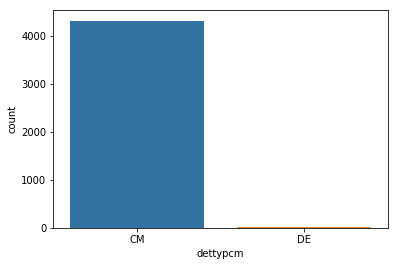

In [16]:
#df1 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(X_category.columns):
    plt.figure(i)
    sns.countplot(x=col, data=X_category)

Based on selected features, can we predict the probability of someone being arrested?

In [17]:
X.isna().sum().max()

1850

In [18]:
y.value_counts()

0    4756
1     330
Name: arstmade, dtype: int64

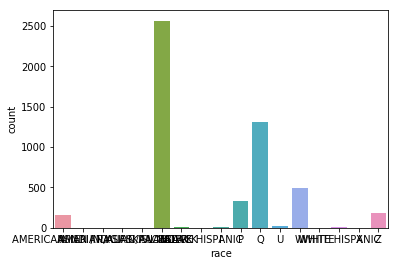

In [19]:
sns.countplot('race', data=X_category);

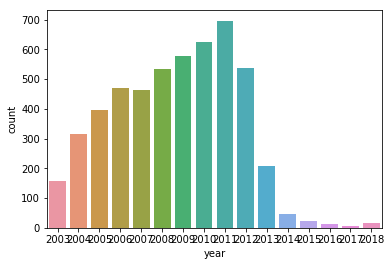

In [20]:
sns.countplot('year', data=X_non_category);

In [21]:
# Only works if there are no NaNs
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# sel.fit_transform(X_non_category)
# sel

In [22]:
X_non_category.head()

,year,pct,ser_num,perobs,perstop,explnstp,othpers,sumissue,compyear,comppct,...,age,ht_feet,ht_inch,weight,addrpct,xcoord,ycoord,linecm,detailcm,wepfound
4870252,2013,83,2126.0,3.0,2.0,1,0,0,0.0,0.0,...,33.0,5,5,150.0,83,1006818.0,191331.0,1.0,85.0,0
2615585,2009,47,3059.0,1.0,1.0,1,0,0,0.0,0.0,...,21.0,5,6,150.0,47,1021320.0,259141.0,1.0,20.0,0
1564042,2007,105,2874.0,1.0,3.0,1,1,0,0.0,0.0,...,34.0,5,4,170.0,105,1053736.0,199923.0,1.0,14.0,0
791830,2005,49,11934.0,2.0,2.0,1,1,0,0.0,0.0,...,18.0,5,8,170.0,NaN,NaN,NaN,NaN,NaN,0
1225627,2006,84,3479.0,2.0,3.0,1,0,0,0.0,0.0,...,43.0,5,11,185.0,84,988089.0,190305.0,NaN,68.0,0


In [23]:
X_non_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 4870252 to 2844916
Data columns (total 74 columns):
year        5086 non-null Int64
pct         5086 non-null Int64
ser_num     5086 non-null float64
perobs      5076 non-null float64
perstop     5086 non-null float64
explnstp    5086 non-null int8
othpers     5086 non-null int8
sumissue    5086 non-null int8
compyear    5064 non-null float64
comppct     5064 non-null float64
offunif     5086 non-null int8
frisked     5086 non-null int8
searched    5086 non-null int8
contrabn    5086 non-null int8
adtlrept    5086 non-null int8
pistol      5086 non-null int8
riflshot    5086 non-null int8
asltweap    5086 non-null int8
knifcuti    5086 non-null int8
machgun     5086 non-null int8
othrweap    5086 non-null int8
pf_hands    5086 non-null int8
pf_wall     5086 non-null int8
pf_grnd     5086 non-null int8
pf_drwep    5086 non-null int8
pf_ptwep    5086 non-null int8
pf_baton    5086 non-null int8
pf_hcuff    5086 non-null int8

In [24]:
# for feature in X_non_category.columns:
#     print(X_non_category['feature'].value_counts())

### Let's try modeling the categorical data

In [25]:
df_model = df_sample[['eyecolor', 'sex', 'arstmade']]
df_model = df_model.dropna()
X_model = df_model[['eyecolor', 'sex']]
y_model = df_model['arstmade']
print(len(y_model))
X_model

encoder = preprocessing.OneHotEncoder()
X_model = encoder.fit_transform(X_model)

5086


In [26]:
"""Transform your data"""
#X_model = X_model.reshape(-1, 1)
#X_model = X_model.toarray()


"""Optional: Hot encode your categorical data"""
#encoder = preprocessing.OneHotEncoder()
#X_model = encoder.fit_transform(X_model)
"""Split your code"""

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,
                                                    stratify=y_model)
"""Pipeline"""
"""Optional: Scale your numerical training data"""
#scaler = StandardScaler()

"""Optional: Perform over or under sampling techniques here"""
#from imblearn.over_sampling import SMOTE
#smt.SMOTE()
#X_train, y_train = smt.fit_sample(X_train, y_train)
"""Declare your model"""
#clf = svm.SVC()
#clf.fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)
#rf.feature_importances_
#RandomForestClassifier(max_depth=2, random_state=0)
print(rf.feature_importances_)
#print(clf.predict([[0, 0, 0, 0]]))
"""Do a grid search"""
#parameters = {'param_1': ('option_1', 'option_2'), 'param_2':[1, 10, 100], ...}
#model_tuned = GridSearchCV(model, parameters, cv=5)
#model_tuned.fit(X_train, y_train)


"""Make predictions"""
predictions = rf.predict(X_test)
"""Check the accuracy of your model"""
print(accuracy_score(y_test, predictions))

[0.1456432  0.         0.11323483 0.4686145  0.         0.01530424
 0.00818413 0.         0.         0.         0.         0.06546384
 0.11636683 0.06718844]
0.934748427672956


/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
y

4870252    0
2615585    0
1564042    0
791830     0
1225627    0
          ..
3373136    0
1442388    0
4787054    0
209046     0
2844916    0
Name: arstmade, Length: 5086, dtype: int8